### Dense Neural Network

In [1]:
# Import data
from keras.datasets import mnist
from matplotlib import pyplot as plt

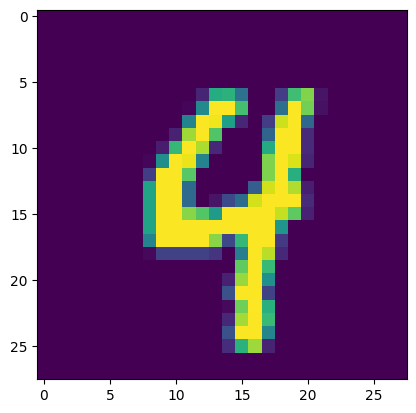

In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.imshow(X_train[3100])
plt.show()

In [3]:
y_train[3100]

4

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
y_test[24]

4

In [6]:
# Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from keras.utils import np_utils
from keras.utils import to_categorical

In [7]:
y_train_ = to_categorical(y_train)

In [8]:
y_train_.shape

(60000, 10)

In [9]:
# (Flashback from optimimization algs notebook)

# flatten 28*28 images to a 784 vector for each image
X_train = np.array(X_train)
X_test = np.array(X_test)
print(X_train.shape)
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    return model

model_dense = baseline_model()
model_dense.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history_dense = model_dense.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=32, verbose=2)

(60000, 28, 28)
Epoch 1/10


C:\Users\Ilia\ITMO_algorithms\machine_learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 - 3s - 2ms/step - accuracy: 0.9386 - loss: 0.2037 - val_accuracy: 0.9743 - val_loss: 0.0948
Epoch 2/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9752 - loss: 0.0797 - val_accuracy: 0.9810 - val_loss: 0.0685
Epoch 3/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9837 - loss: 0.0518 - val_accuracy: 0.9815 - val_loss: 0.0665
Epoch 4/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9886 - loss: 0.0362 - val_accuracy: 0.9833 - val_loss: 0.0630
Epoch 5/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9908 - loss: 0.0268 - val_accuracy: 0.9807 - val_loss: 0.0742
Epoch 6/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9929 - loss: 0.0201 - val_accuracy: 0.9825 - val_loss: 0.0719
Epoch 7/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9942 - loss: 0.0171 - val_accuracy: 0.9827 - val_loss: 0.0750
Epoch 8/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9958 - loss: 0.0132 - val_accuracy: 0.9817 - val_loss: 0.0795
Epoch 9/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9956 - loss: 0.0140 - val_accuracy: 0.9827 - val_loss: 0

In [10]:
print(28*28)

784


In [11]:
print(history_dense.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [12]:
model_dense.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,869,872 (7.13 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,246,582 (4.76 MB)

Accuracy of the Dense model =  0.98 



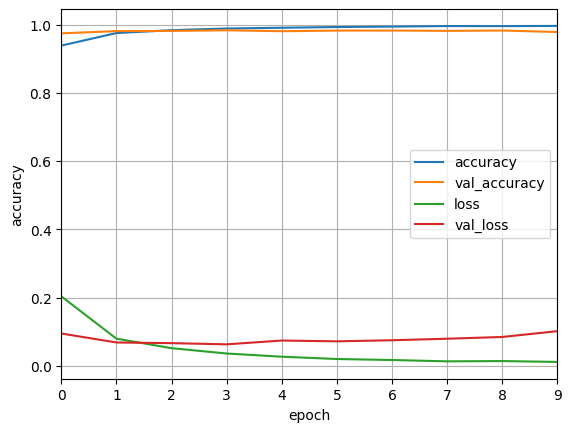

In [13]:
score = model_dense.evaluate(X_test, y_test, verbose=0)
print('Accuracy of the Dense model = ', round(score[1], 2), "\n")

# summarize history for loss
plt.plot(history_dense.history['accuracy'])
plt.plot(history_dense.history['val_accuracy'])
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.xlim(0, 9)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

### Convolutional Neural Network

In [14]:
# Preprocess input data for CNN model

# reload the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [15]:
# Preprocess class labels
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [16]:
#  Define model architecture
model = Sequential()

# Creating a Sequential Model and adding the layers
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening the 2D arrays for fully connected layers
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

C:\Users\Ilia\ITMO_algorithms\machine_learning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
#  Fit model on training data
history_cnn = model.fit(X_train, Y_train, validation_split=0.1,
                        batch_size=32, epochs=10, verbose=2)

Epoch 1/10
1688/1688 - 4s - 2ms/step - accuracy: 0.8812 - loss: 0.3917 - val_accuracy: 0.9672 - val_loss: 0.1119
Epoch 2/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9456 - loss: 0.1841 - val_accuracy: 0.9738 - val_loss: 0.0906
Epoch 3/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9564 - loss: 0.1404 - val_accuracy: 0.9797 - val_loss: 0.0710
Epoch 4/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9639 - loss: 0.1158 - val_accuracy: 0.9788 - val_loss: 0.0672
Epoch 5/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9683 - loss: 0.0989 - val_accuracy: 0.9815 - val_loss: 0.0668
Epoch 6/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9719 - loss: 0.0892 - val_accuracy: 0.9818 - val_loss: 0.0651
Epoch 7/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9738 - loss: 0.0809 - val_accuracy: 0.9837 - val_loss: 0.0596
Epoch 8/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9764 - loss: 0.0726 - val_accuracy: 0.9830 - val_loss: 0.0647
Epoch 9/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9776 - loss: 0.0684 - val_accuracy: 0.9843 - 

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4732)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       151,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 456,200 (1.74 MB)

 Trainable params: 152,066 (594.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304,134 (1.16 MB)

In [20]:
# list all data in history
print(history_cnn.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Accuracy of the CNN model =  0.98 



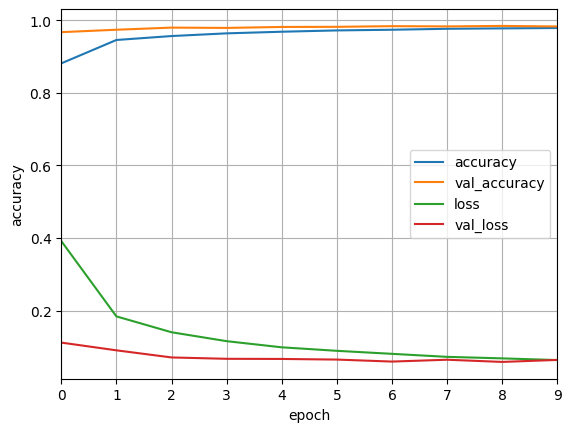

In [21]:
# summarize history for loss
score = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy of the CNN model = ', round(score[1], 2), "\n")

# summarize history for loss
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.xlim(0,9)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

In [22]:
# Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
score

[0.06723912060260773, 0.9797000288963318]